# Web Scraping: Earthquakes data from Seismonepal.gov.np

## Import Packages

In [1]:
import requests #https://requests.readthedocs.io/en/master/
from pyquery import PyQuery as pq #for XPath and Css Selectors: https://pythonhosted.org/pyquery/
from urllib.request import urlopen
import re

### Define URL to Scrape

In [2]:
url='http://www.seismonepal.gov.np/' #http://seismonepal.gov.np/earthquakes/2019

## read/load url and return pagesource converted as PyQuery object

In [3]:
def read_url(url):
    '''using pyquery'''
    pageSource = requests.get(url).text  #receiving 'view source'
    #return pq(pageSource)
    return pageSource
    
    '''using urlopen'''
    #pageSource = urlopen(url).read()    
    #return pq(pageSource)    #return pageSource

lets load the URL and obtain pagesource or pyquery object!

In [4]:
page = read_url(url)

In [5]:
print(type(page))

<class 'str'>


In [6]:
print(page[0:1000])
print('.....'*20)

<!DOCTYPE html>
<html class="no-js" lang="">
<head>
    <meta charset="utf-8"/>
    <meta http-equiv="x-ua-compatible" content="ie=edge">
    <title>National Earthquake Monitoring & Research Center</title>
    <meta name="description" content="Department of Mines and Geology"/>
    <meta name="keyword" content="National Earthquake Monitoring & Research Center, Earthquake, Nepal, Epicenter"/>
    <meta name="viewport" content="width=device-width, initial-scale=1"/>
    <link rel="icon" href="http://seismonepal.gov.np/assets/nav_img/nepal-logo.png">
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0-beta.2/css/bootstrap.min.css" integrity="sha384-PsH8R72JQ3SOdhVi3uxftmaW6Vc51MKb0q5P2rRUpPvrszuE4W1povHYgTpBfshb" crossorigin="anonymous"/>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css"/>
    <link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css"/>
    <link rel="stylesheet" hr

In [7]:
print(type(pq(page))) #pq(page)

<class 'pyquery.pyquery.PyQuery'>


### Find the content from <title <meta..keyword and <meta..description

In [8]:
title=pq(page).find('title').text() #check here if page is an object of pyquery or not
print(title)

National Earthquake Monitoring & Research Center


In [9]:
meta = pq(page).find('meta:last').attr('name') #check here if page is an object of pyquery or not
print(meta)

viewport


In [10]:
keyword = pq(page).find('meta[name="keyword"]').attr('content') #check here if page is an object of pyquery or not
print(keyword)

National Earthquake Monitoring & Research Center, Earthquake, Nepal, Epicenter


In [11]:
description = pq(page).find('meta[name="description"]').attr('content') #check here if page is an object of pyquery or not
print(description)

Department of Mines and Geology


### Identify the data container, elements as required!  

In [12]:
data = pq(page).find('table.data_table').html() #confirming the content we have choosen!
print(data[200:800])

                  <th scope="col">Latitude</th>
                                <th scope="col">Longitude</th>
                                <th scope="col">Magnitude(ML)</th>
                                <th scope="col">Remarks</th>
                                <th scope="col">Epicenter</th>
                                <th scope="col">Form</th>
                            </tr>
                            </thead>
                            <tbody>
                                                                                                                                     


In [13]:
head = pq(page).find('table.data_table thead').html() #load <thead> HTML from table
print(head)


                            <tr>
                                <th scope="col">Date</th>
                                <th scope="col">Time</th>
                                <th scope="col">Latitude</th>
                                <th scope="col">Longitude</th>
                                <th scope="col">Magnitude(ML)</th>
                                <th scope="col">Remarks</th>
                                <th scope="col">Epicenter</th>
                                <th scope="col">Form</th>
                            </tr>
                            


In [14]:
headText = pq(page).find('table.data_table thead').text() #load <thead> texts from table
print(headText)

Date
Time
Latitude
Longitude
Magnitude(ML)
Remarks
Epicenter
Form


In [15]:
print(headText.split("\n")) #Looks fine if we are ready for Column names!

['Date', 'Time', 'Latitude', 'Longitude', 'Magnitude(ML)', 'Remarks', 'Epicenter', 'Form']


In [31]:
body = pq(page).find('table.data_table tbody').html() #load <tbody> HTML from table
print(body[200:700])

 

                                <tr class="highlight1">
                                   <td scope="row" class="table-date"><div><small>B.S:</small>2077-4-31<br/><small>A.D:</small>2020-08-15</div></td>

 <td class="table-time"><small>Local:</small>  16:07<br/><small style="clear:both">UTC:</small>   10:22</td>
                                    <td class="table-latitude">27.8</td>
                                    <td class="table-longitude">87.62</td>
                                  


In [16]:
#Row wise picking/extraction!

#:first, :last, :eq(0), :eq(1), :eq(2)
#<tag>.className = table.data_table!

firstRow = pq(page).find('table.data_table tbody tr:first').text() 
print(firstRow)

B.S:2077-5-31
A.D:2020-09-15
Local:  05:19
UTC:   23:34
27.77
85.88
6.0
NEMRC
Sindhupalchowk
Did You feel it ?


In [33]:
print(firstRow.split("\n"))

['B.S:2077-4-31', 'A.D:2020-08-15', 'Local:\xa0\xa016:07', 'UTC:\xa0\xa0\xa010:22', '27.8', '87.62', '4.2', 'NSC', 'Sankhuwasabha', 'Did You feel it ?']


### Contains unwanted data too! so cleaning is also required here or even we can process data cleaning after collection has been completed!

In [17]:
discardElements = pq(page).find('table.data_table tbody tr:first').find('small').remove().text() 
print(discardElements)

B.S: A.D: Local: UTC:


In [37]:
pq(page).find('table.data_table tbody tr:first').find('small').remove()

[<small>, <small>, <small>, <small>]

In [18]:
#removing all <small> tags found inside tr:first!

firstRowNew = pq(page).find('table.data_table tbody tr:first').remove('small')
print(firstRowNew)

<tr class="highlight1">
                                   <td scope="row" class="table-date"><div> 2077-5-31<br/> 2020-09-15</div></td>

 <td class="table-time">   05:19<br/>    23:34</td>
                                    <td class="table-latitude">27.77</td>
                                    <td class="table-longitude">85.88</td>
                                    <td class="table-magnitude">6.0</td>
                                    <td class="table-remarks">NEMRC</td>
                                    <td class="table-epicenter"><a href="http://seismonepal.gov.np/earthquake-epicenter-google-map/1031" title="Click to see Google Map point of this" style="text-decoration: underline;">Sindhupalchowk</a></td>
                                    <td><a href="http://seismonepal.gov.np/did-you-feel-it-" class="btn btn-primary">Did You feel it ?</a></td>
                                </tr>
                                                            
                           



In [19]:
#check the data from firstRowNew after cleaning/removing <small>

newRow = pq(firstRowNew).text()
print(newRow)
print('----'*20)

print(newRow.split("\n"))

2077-5-31
2020-09-15
05:19
23:34
27.77
85.88
6.0
NEMRC
Sindhupalchowk
Did You feel it ?
--------------------------------------------------------------------------------
['2077-5-31', '2020-09-15', '05:19', '23:34', '27.77', '85.88', '6.0', 'NEMRC', 'Sindhupalchowk', 'Did You feel it ?']


In [20]:
#removing all <small> and <a> found inside tr:first!
#firstRowNewAgain = pq(page).find('table.data_table tbody tr:first').remove('small,a')

'''
Removing all <small> 
<a> (picking <a> only with class='btn')
<td class="table-remarks"> 
found inside tr:first!
'''
firstRowNewAgain = pq(page).find('table.data_table tbody tr:first').remove('small,a.btn,td.table-remarks')
#print(firstRowNewAgain)

print(str(firstRowNewAgain).strip())        #strip() unwanted spaces 

<tr class="highlight1">
                                   <td scope="row" class="table-date"><div> 2077-5-31<br/> 2020-09-15</div></td>

 <td class="table-time">   05:19<br/>    23:34</td>
                                    <td class="table-latitude">27.77</td>
                                    <td class="table-longitude">85.88</td>
                                    <td class="table-magnitude">6.0</td>
                                     
                                    <td class="table-epicenter"><a href="http://seismonepal.gov.np/earthquake-epicenter-google-map/1031" title="Click to see Google Map point of this" style="text-decoration: underline;">Sindhupalchowk</a></td>
                                    <td/>
                                </tr>


In [21]:
newRowAgain = pq(firstRowNewAgain).text()
print(newRowAgain)
print('----'*20)
print(newRowAgain.split("\n"))

2077-5-31
2020-09-15
05:19
23:34
27.77
85.88
6.0
Sindhupalchowk
--------------------------------------------------------------------------------
['2077-5-31', '2020-09-15', '05:19', '23:34', '27.77', '85.88', '6.0', 'Sindhupalchowk']


## Loop through multiple rows and extract data

In [22]:
#cleaned content from Seismonepal!

allRowMaterial = pq(page).find('table.data_table tbody').remove('small,a.btn,td.table-remarks')
#print(allRowMaterial.text())
print(len(pq(allRowMaterial).find('tr')))

19


In [23]:
finalList=list() #['Date', 'Time', 'Latitude', 'Longitude', 'Magnitude(ML)', 'Epicenter']
magnitudes=list()

for row in pq(allRowMaterial).find('tr').items(): #each and every selected element traverse/travel!
    edate = row.find('td.table-date').text().strip()
    etime = row.find('td.table-time').text().strip()
    elatitude = row.find('td.table-latitude').text().strip()
    elongitude = row.find('td.table-longitude').text().strip()
    emagnitude = row.find('td.table-magnitude').text().strip()
    epicentre = row.find('td.table-epicenter').text().strip()
    
    if edate:
        finalList.append([edate, etime, elatitude, elongitude, emagnitude, epicentre])
        magnitudes.append(float(emagnitude))
        
print(finalList)

[['2077-5-31\n2020-09-15', '05:19\n23:34', '27.77', '85.88', '6.0', 'Sindhupalchowk'], ['2077-5-26\n2020-09-11', '09:30\n03:45', '26.76', '88.21', '5.0', 'Nepal India Border'], ['2077-5-24\n2020-09-09', '15:48\n10:03', '27.92', '84.94', '4.0', 'Dhading'], ['2077-5-19\n2020-09-04', '07:20\n01:35', '27.58', '87.19', '4.0', 'Sankhuwasabha'], ['2077-5-9\n2020-08-25', '21:09\n15:24', '29.59', '80.89', '4.7', 'Bajhang'], ['2077-4-31\n2020-08-15', '16:07\n10:22', '27.8', '87.62', '4.2', 'Sankhuwasabha'], ['2077-3-2\n2020-06-16', '09:53\n04:08', '27.88', '86.20', '4.1', 'Dolakha'], ['2077-2-17\n2020-05-30', '21:36\n15:51', '27.85', '84.93', '4.8', 'Dhading'], ['2077-2-13\n2020-05-26', '16:00\n10:15', '29.73', '82.01', '4.2', 'Humla/Mugu'], ['2077-1-30\n2020-05-12', '23:53\n18:08', '27.65', '86.15', '5.3', 'Dolakha'], ['2077-1-4\n2020-04-15', '00:55\n19:10', '27.55', '86.59', '4.7', 'Solukhumbu'], ['2076-12-20\n2020-04-02', '20:55\n15:10', '29.58', '80.96', '4.0', 'Bajhang'], ['2076-12-12\n2020

In [24]:
print("Total Records found: ",len(finalList))
print(finalList[0])
print(finalList[-1])

Total Records found:  19
['2077-5-31\n2020-09-15', '05:19\n23:34', '27.77', '85.88', '6.0', 'Sindhupalchowk']
['2076-9-28\n2020-01-12', '02:07\n20:22', '29.59', '81.73', '4.2', 'Bajura']


In [25]:
print(magnitudes)

[6.0, 5.0, 4.0, 4.0, 4.7, 4.2, 4.1, 4.8, 4.2, 5.3, 4.7, 4.0, 4.0, 5.0, 4.3, 4.3, 4.2, 4.5, 4.2]


### General Plotting 

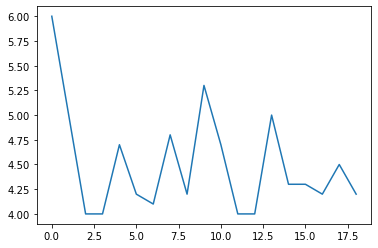

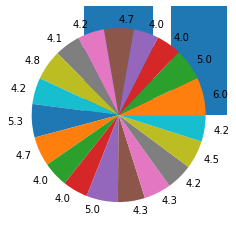

In [33]:
import matplotlib.pyplot as plt
plt.plot(magnitudes) #line
plt.show()
#plt.bar(range(0,19),magnitudes) #bar
#plt.show()
plt.pie(magnitudes,labels=magnitudes)#pie
plt.show()


In [ ]:
'''allRows = pq(page).find('table.data_table tbody tr').remove('small,a.btn,td.table-remarks').text()
for row in pq(allRows).items():
    print(row)
    break
'''

# Tasks
1. edate , etime: remove values before '\n'
2. Create CSV and JSON file with cleaned data

#Final Task
#Project http://seismonepal.gov.np/earthquakes/2019 Apply! - 'Scraping_seismonepal_2019'